In [134]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [135]:
dataset = pd.read_csv('C:/Users/user/Downloads/heart.csv')

In [136]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [138]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [139]:
#sample which shows us value of random rows
dataset.sample(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2,0
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3,0
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3,0
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2,1
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0


In [140]:
dataset.sample(frac=0.01)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3,0
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1


In [141]:
#We will list all the columns for all data. We check all columns. Is there any spelling mistake?
print('Data Show Columns:\n')
dataset.columns

Data Show Columns:



Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [142]:
#And, how many rows and columns are there for all data?
print('Data Shape Show\n')
dataset.shape  #first one is rows, other is columns

Data Shape Show



(303, 14)

In [143]:
#Now,I will check null on all data and If data has null, 
#I will sum of null data's. In this way, how many missing data is in the data.
print('Sum of Null Values of data are: \n')
dataset.isnull().sum()

Sum of Null Values of data are: 



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [144]:
#all rows control for null values
dataset.isnull().values.any()

False

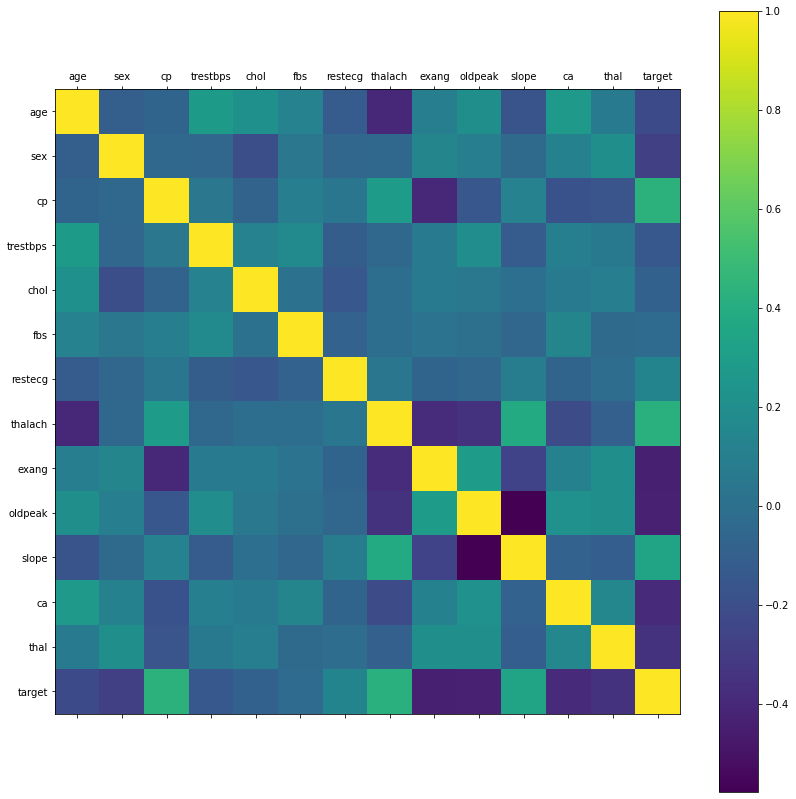

In [145]:
# to understand the data with the help of corelation model

rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C2EC3F8790>,
      dtype=object)

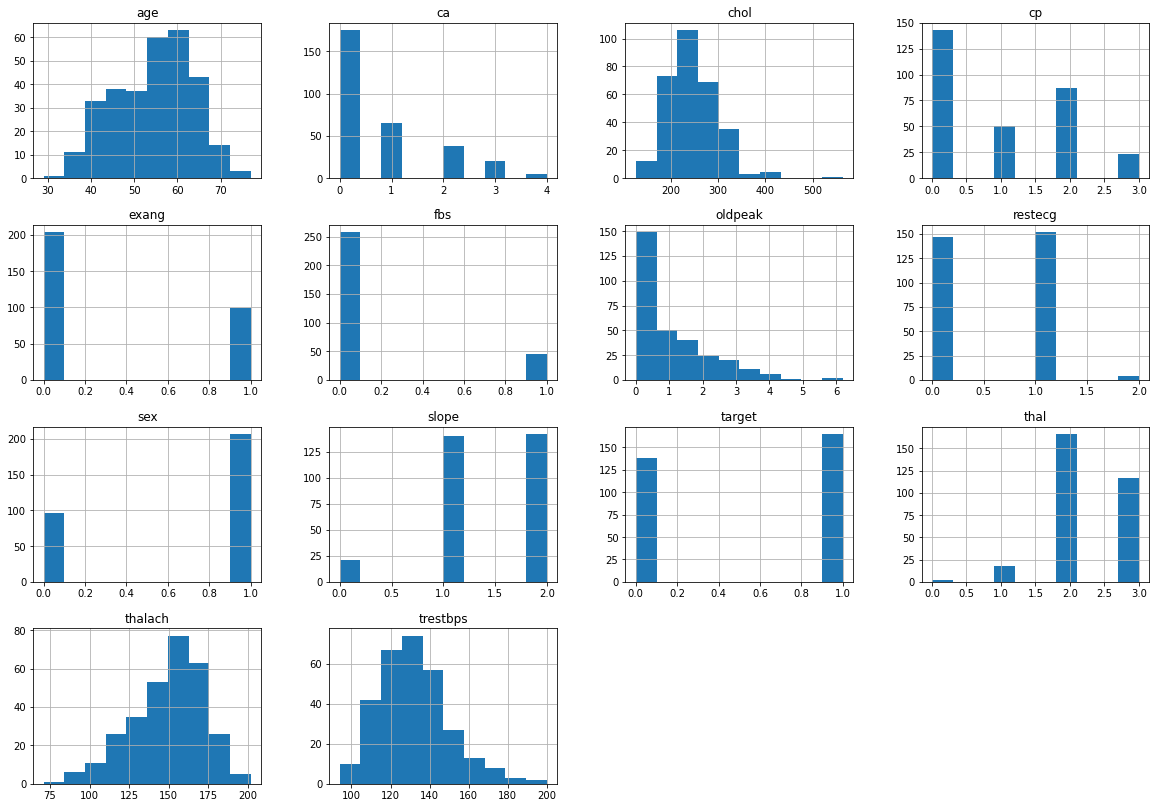

In [146]:
dataset.hist()

Text(0.5, 1.0, 'Count of each Target Class')

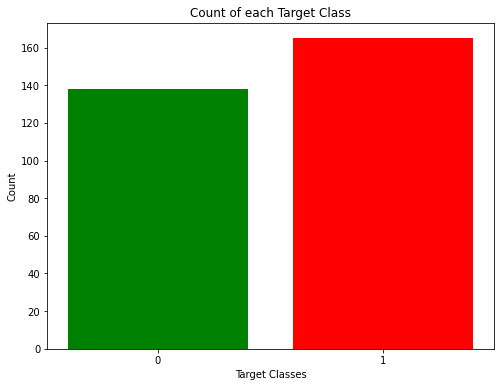

In [147]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

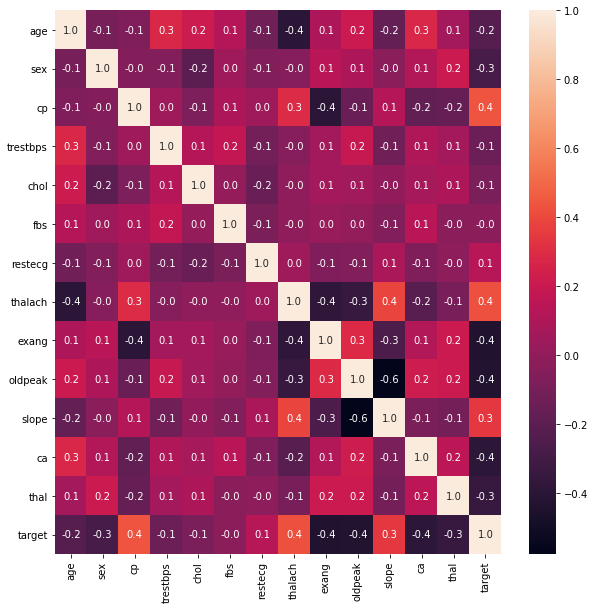

In [148]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True,fmt='.1f')
plt.show()

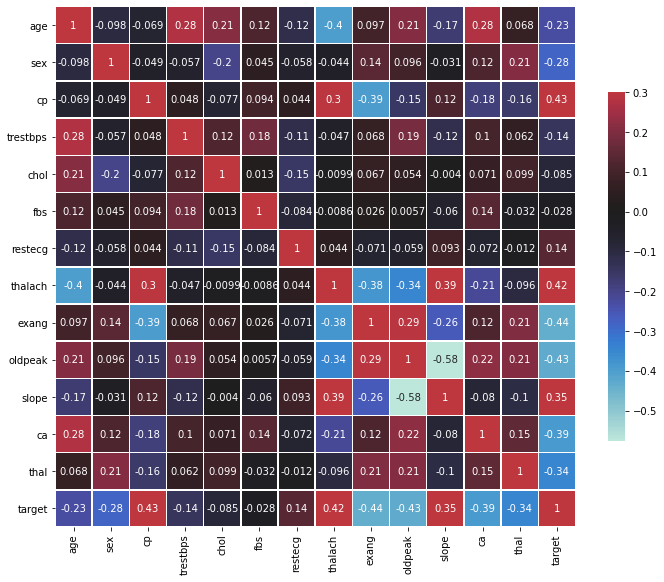

In [149]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

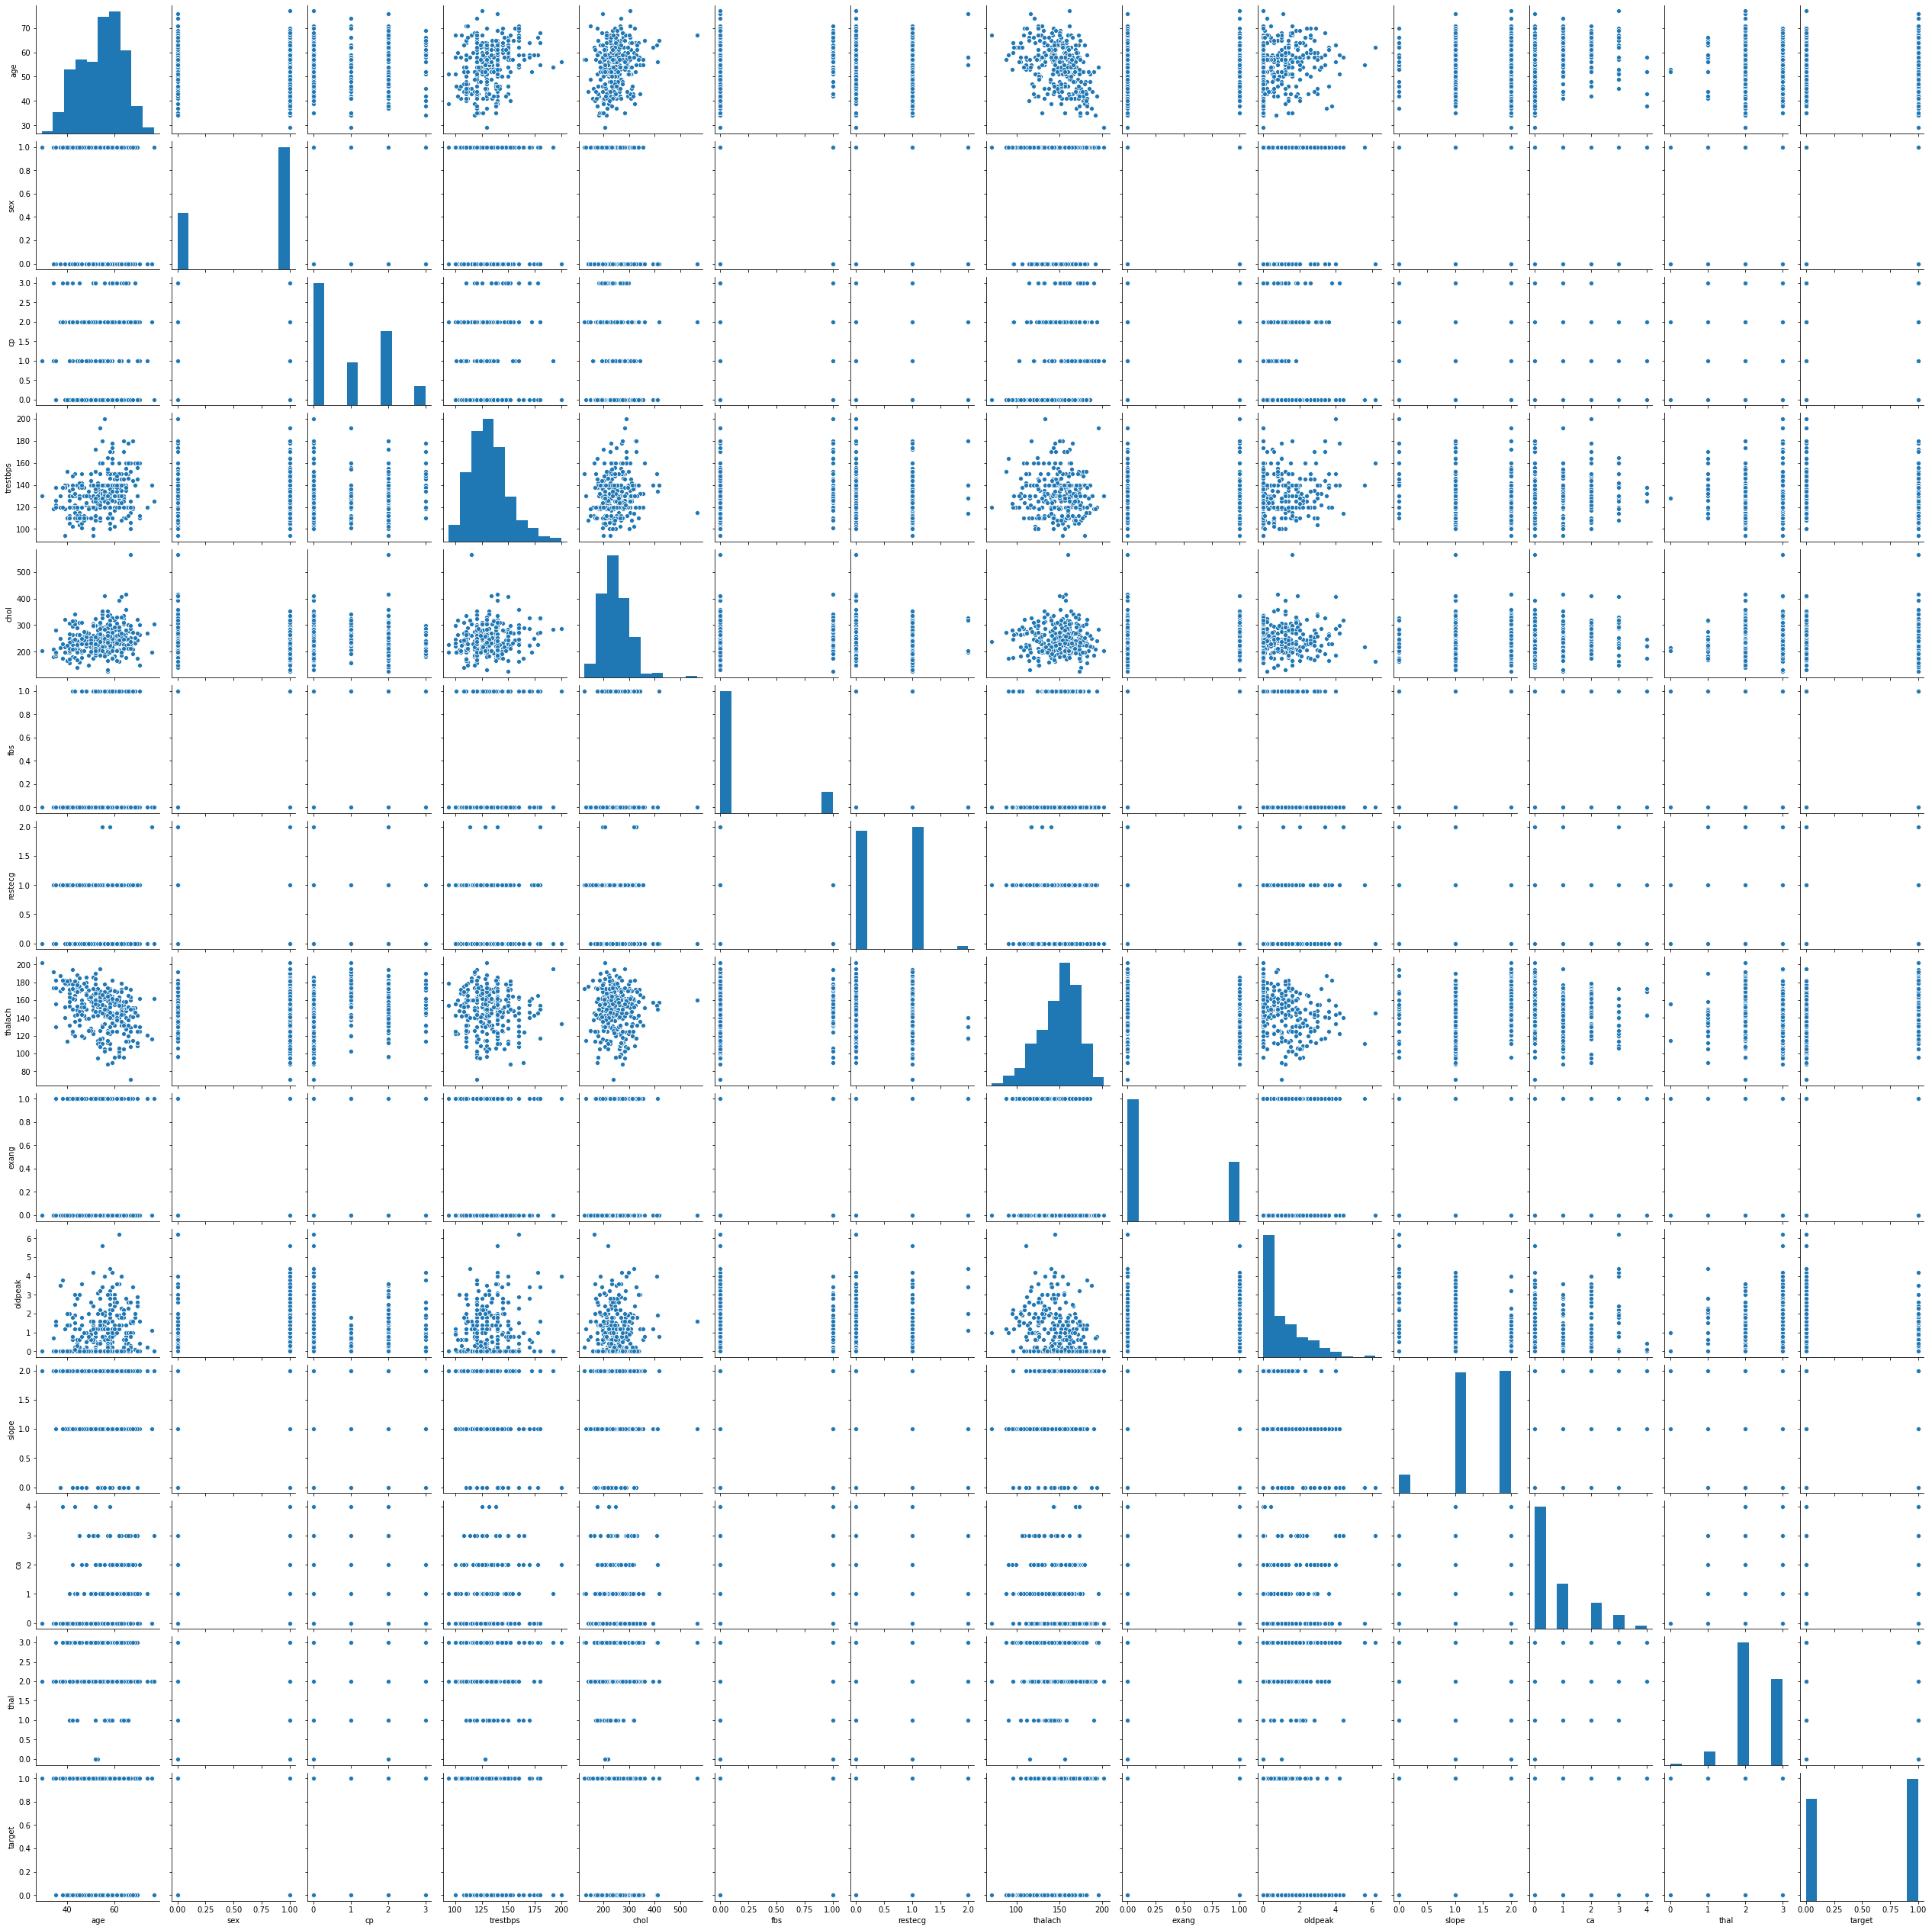

In [150]:
sns.pairplot(dataset)
plt.show()

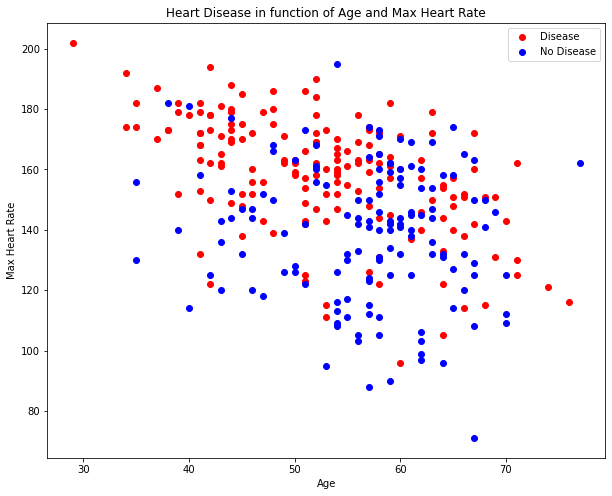

In [151]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(dataset.age[dataset.target==1],
            dataset.thalach[dataset.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(dataset.age[dataset.target==0],
            dataset.thalach[dataset.target==0],
            c="blue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

# STANDARD SCALAR

In [152]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])


# TRAIN AND TEST DATASET

In [153]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

## CATEGORICAL DATA

In [154]:
       
categorical_val = []
continous_val = []
for column in dataset.columns:
    print('==============================')
    print(f"{column} : {dataset[column].unique()}")
    if len(dataset[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [ 0.9521966  -1.91531289 -1.47415758  0.18017482  0.29046364 -1.1432911
 -0.26098049 -0.04040284 -0.7021358  -0.59184697  1.06248543  0.40075247
 -0.48155814  1.28306308 -1.25357993  1.61392956  0.5110413  -1.36386876
  0.73161895 -1.58444641  1.83450721 -0.37126932  1.17277425 -0.15069166
 -0.92271345 -1.03300228 -1.69473524 -0.81242462  0.84190778 -2.24617937
 -2.13589054 -2.7976235   0.06988599  0.62133012  1.39335191  1.50364073
  2.16537369  2.38595135  1.72421839 -1.80502406  2.49624017]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [ 0.76395577 -0.09273778 -0.66386682  0.47839125  2.30600417  1.04952029
 -1.23499586  0.19282673  1.62064933 -1.52056038 -0.3783023   0.59261706
  1.33508481 -1.57767328  0.36416545 -0.20696359 -1.34922166  0.13571383
 -0.54964101 -0.94943134 -0.77809263 -1.80612489 -0.43541521 -2.14880232
 -1.12077005 -1.69189909  1.1637461  -1.74901199  0.02148802  0.93529448
  2.64868159 -0.14985069  2.7629074   0.24993964 -0.3211894  -1.46344747
  1.39219771  2.191

In [155]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

#  CONFUSION MATRIX, ACCURACY SCORE, CLASSIFICATION REPORT AND ROC CURVE FOR EACH ALGORITHMS

In [156]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import sklearn.metrics as metrics
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# FOR LOGISTIC REGRESSION

In [157]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [158]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)
#lr_clf(X_train,y_train,X_test,y_test,1,100)

Train Result:
Accuracy Score: 84.91%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.857143    0.843750  0.849057    0.850446      0.849562
recall      0.782609    0.900000  0.849057    0.841304      0.849057
f1-score    0.818182    0.870968  0.849057    0.844575      0.848061
support    92.000000  120.000000  0.849057  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 72  20]
 [ 12 108]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.902439   0.820000  0.857143   0.861220      0.861672
recall      0.804348   0.911111  0.857143   0.857729      0.857143
f1-score    0.850575   0.863158  0.857143   0.856866      0.856797
support    46.000000  45.000000  0.857143  91.000000     91.000000
_____________

In [159]:

test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100
results_dataset = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],
 columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_dataset


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,84.90566,85.714286


[[37  9]
 [ 2 43]]


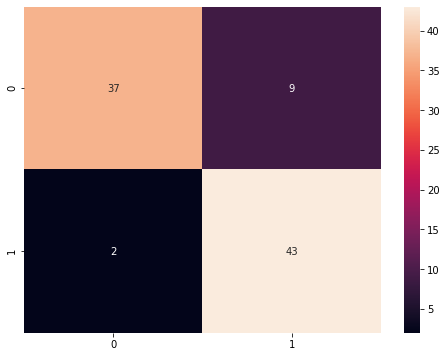

In [160]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=0.1,penalty='l2',random_state=0)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

LOGISTIC REGRESSION COEEFICIENT, INTERCEPT, PROBAB VALUE

In [161]:
print('CoEf:\n')
print(lr.coef_)
print('Intercept_\n')
print(lr.intercept_)
print('Proba:\n')
print(lr.predict_log_proba)

CoEf:

[[ 0.02923251 -0.5520611   0.50816529 -0.12942532 -0.14484982 -0.10098878
   0.11582301  0.33893349 -0.26827915 -0.50177996  0.31073656 -0.58838622
  -0.62856465]]
Intercept_

[1.58202809]
Proba:

<bound method LogisticRegression.predict_log_proba of LogisticRegression(C=0.1, random_state=0)>


# K NEAREST NEIGHBOUR 

In [162]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.38%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.876543    0.839695  0.853774    0.858119      0.855686
recall      0.771739    0.916667  0.853774    0.844203      0.853774
f1-score    0.820809    0.876494  0.853774    0.848652      0.852329
support    92.000000  120.000000  0.853774  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 71  21]
 [ 10 110]]

Test Result:
Accuracy Score: 82.42%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.916667   0.763636  0.824176   0.840152      0.840992
recall      0.717391   0.933333  0.824176   0.825362      0.824176
f1-score    0.804878   0.840000  0.824176   0.822439      0.822246
support    46.000000  45.000000  0.824176  91.000000     91.000000
_____________

In [163]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_dataset_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_dataset = results_dataset.append(results_dataset_2, ignore_index=True)
results_dataset

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,84.905660,85.714286
1,K-nearest neighbors,85.377358,82.417582


[[36 10]
 [ 3 42]]


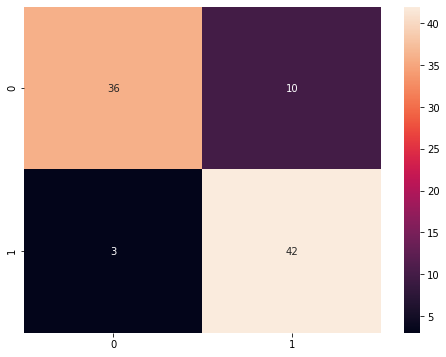

In [164]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=22)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

from sklearn.metrics import r2_score,accuracy_score

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

# SUPPORT VECTOR CLASSIFIER

In [165]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 89.15%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.936709    0.864662  0.891509    0.900685      0.895927
recall      0.804348    0.958333  0.891509    0.881341      0.891509
f1-score    0.865497    0.909091  0.891509    0.887294      0.890173
support    92.000000  120.000000  0.891509  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 74  18]
 [  5 115]]

Test Result:
Accuracy Score: 84.62%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.921053   0.792453  0.846154   0.856753      0.857459
recall      0.760870   0.933333  0.846154   0.847101      0.846154
f1-score    0.833333   0.857143  0.846154   0.845238      0.845107
support    46.000000  45.000000  0.846154  91.000000     91.000000
_____________

In [166]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_dataset_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_dataset = results_dataset.append(results_dataset_2, ignore_index=True)
results_dataset


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,84.905660,85.714286
1,K-nearest neighbors,85.377358,82.417582
2,Support Vector Machine,89.150943,84.615385


[[35 11]
 [ 3 42]]


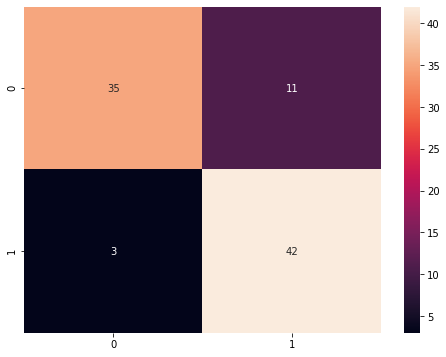

In [167]:
from sklearn.metrics import roc_curve, auc
svc=SVC(C=5,degree=2,gamma=0.06,kernel='rbf',probability=True,random_state=0)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [168]:
print('Coef :',svc.coef0)
print('Dual Coef_',svc.dual_coef_)
print('Fit Status :',svc.fit_status_)
print('Gamma :',svc.gamma)
print('Kernel :',svc.kernel)
print('SV :',svc.support_vectors_)
print('Probablity :',svc.probability)

Coef : 0.0
Dual Coef_ [[-5.00000000e+00 -5.00000000e+00 -5.00000000e+00 -5.00000000e+00
  -5.00000000e+00 -5.00000000e+00 -5.00000000e+00 -4.84544162e+00
  -1.62877713e+00 -5.00000000e+00 -1.20031443e+00 -7.51619142e-01
  -1.45985819e+00 -4.64544307e-03 -6.87015559e-01 -5.00000000e+00
  -5.00000000e+00 -5.00000000e+00 -5.00000000e+00 -5.00000000e+00
  -4.86078760e-01 -7.95656534e-01 -5.00000000e+00 -5.00000000e+00
  -5.00000000e+00 -5.00000000e+00 -5.00000000e+00 -4.18408417e+00
  -5.00000000e+00 -3.03745545e+00 -5.00000000e+00 -5.00000000e+00
  -7.28110128e-01 -4.17930636e+00 -5.81682647e-01 -5.00000000e+00
  -4.77220878e+00 -1.65773610e+00 -3.16141857e-01 -5.00000000e+00
  -4.15195449e+00 -5.00000000e+00 -5.00000000e+00 -3.11749124e+00
  -1.13211705e+00 -3.76269714e-01 -4.29181623e+00 -5.00000000e+00
  -5.00000000e+00 -5.00000000e+00 -2.01582781e+00 -4.46342197e+00
  -3.09608327e+00  2.46538796e+00  1.46411600e+00  1.47978921e+00
   5.00000000e+00  5.00000000e+00  5.00000000e+00  4.1

# DECISION TREE CLASSIFIER

In [169]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=100)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    92.0  120.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 92   0]
 [  0 120]]

Test Result:
Accuracy Score: 76.92%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.790698   0.750000  0.769231   0.770349      0.770572
recall      0.739130   0.800000  0.769231   0.769565      0.769231
f1-score    0.764045   0.774194  0.769231   0.769119      0.769063
support    46.000000  45.000000  0.769231  91.000000     91.000000
_______________________________________________
Confusion Matrix: 


In [170]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_dataset_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_dataset = results_dataset.append(results_dataset_2, ignore_index=True)
results_dataset


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,84.905660,85.714286
1,K-nearest neighbors,85.377358,82.417582
2,Support Vector Machine,89.150943,84.615385
3,Decision Tree Classifier,100.000000,76.923077


[[34 12]
 [ 9 36]]


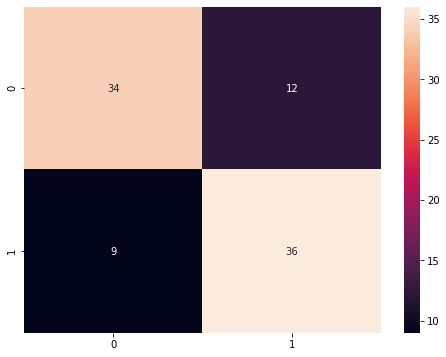

In [171]:
tree_clf = DecisionTreeClassifier(random_state=100)
tree_clf.fit(X_train,y_train)

y_pred=tree_clf.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

# RANDOM FOREST CLASSIFIER

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=10)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    92.0  120.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 92   0]
 [  0 120]]

Test Result:
Accuracy Score: 84.62%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.900000   0.803922  0.846154   0.851961      0.852489
recall      0.782609   0.911111  0.846154   0.846860      0.846154
f1-score    0.837209   0.854167  0.846154   0.845688      0.845595
support    46.000000  45.000000  0.846154  91.000000     91.000000
_______________________________________________
Confusion Matrix: 


In [173]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_dataset_2 = pd.DataFrame(data=[["RANDOM FOREST", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_dataset = results_dataset.append(results_dataset_2, ignore_index=True)
results_dataset

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,84.905660,85.714286
1,K-nearest neighbors,85.377358,82.417582
2,Support Vector Machine,89.150943,84.615385
3,Decision Tree Classifier,100.000000,76.923077
4,RANDOM FOREST,100.000000,84.615385


[[36 10]
 [ 6 39]]


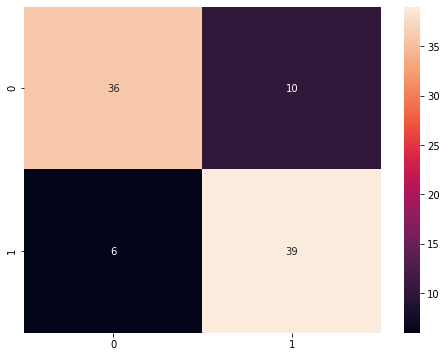

In [174]:
rfc=RandomForestClassifier(max_depth=7,min_samples_split=4,n_estimators=19,random_state=3)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [175]:
for i in range(1,11):
    rf = RandomForestClassifier(n_estimators=i, random_state = 3, max_depth=7)
    rf.fit(X_train, y_train)
    print("TEST set score w/ " +str(i)+" estimators: {:.5}".format(rf.score(X_test, y_test)))


TEST set score w/ 1 estimators: 0.76923
TEST set score w/ 2 estimators: 0.76923
TEST set score w/ 3 estimators: 0.84615
TEST set score w/ 4 estimators: 0.83516
TEST set score w/ 5 estimators: 0.82418
TEST set score w/ 6 estimators: 0.82418
TEST set score w/ 7 estimators: 0.82418
TEST set score w/ 8 estimators: 0.82418
TEST set score w/ 9 estimators: 0.82418
TEST set score w/ 10 estimators: 0.83516


In [176]:
results_dataset

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,84.905660,85.714286
1,K-nearest neighbors,85.377358,82.417582
2,Support Vector Machine,89.150943,84.615385
3,Decision Tree Classifier,100.000000,76.923077
4,RANDOM FOREST,100.000000,84.615385


# AUC AND ROC CURVE OF LOGISTIC REGRESSION

LOGISTIC REGRESSION Accuracy


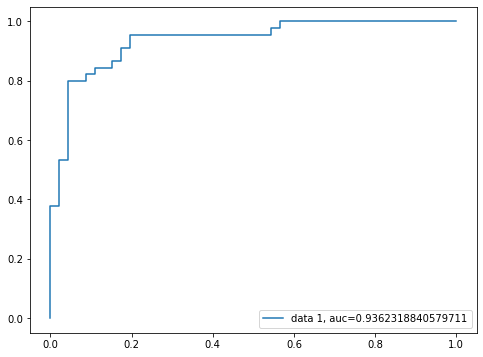

In [177]:
print("LOGISTIC REGRESSION Accuracy")
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC AND ROC CURVE OF SUPPORT VECTOR CLASSIFIER

SVC Accuracy


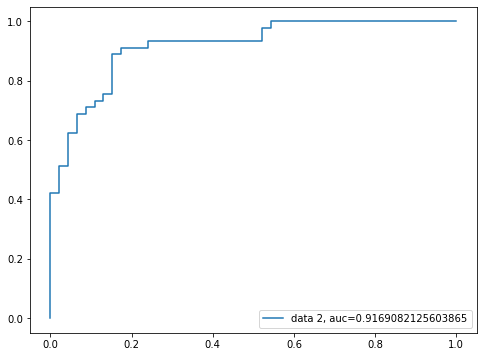

In [178]:
print("SVC Accuracy")
from sklearn import metrics
y_pred_proba = svc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 2, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC AND ROC CURVE OF K NEAREST NEIGHBOUR

KNN Accuracy


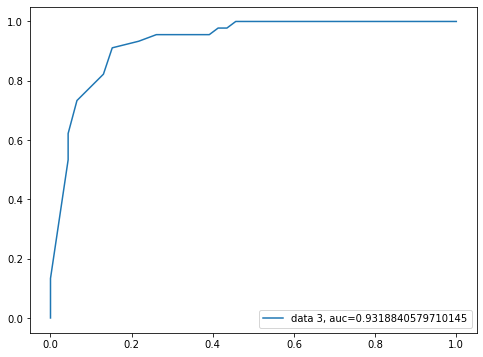

In [179]:
print("KNN Accuracy")
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 3, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC AND ROC CURVE OF DECISION TREE CLASSIFICATION

DECISION TREE Accuracy


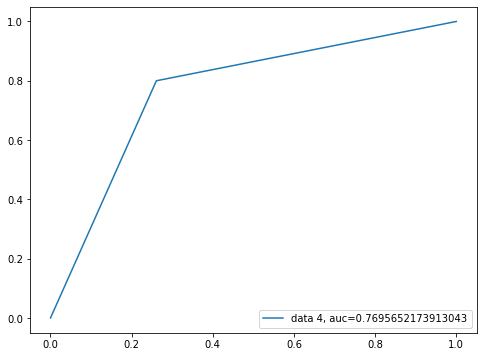

In [180]:
print("DECISION TREE Accuracy")
y_pred_proba = tree_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 4, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC AND ROC CURVE OF OF RANDOM FOREST 

RANDOM FOREST Accuracy


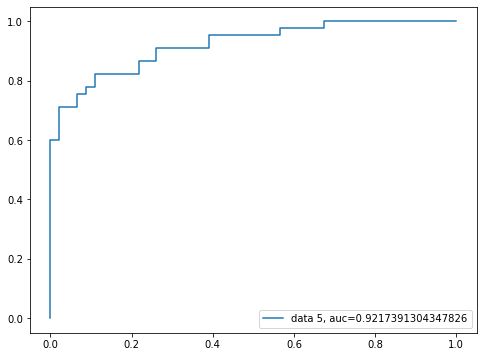

In [181]:
print("RANDOM FOREST Accuracy")
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 5, auc="+str(auc))
plt.legend(loc=4)
plt.show()